In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv("C:/Users/HP/Desktop/weather-check.csv")

In [152]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [153]:
df['US Region'] = df['US Region'].replace(['-'],'Prefer not to answer')

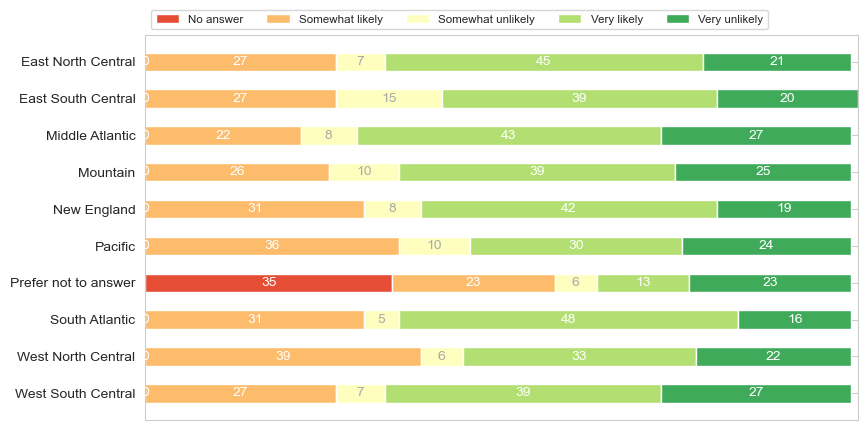

In [154]:
data = df.groupby('US Region')[['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?']].value_counts(normalize=True).unstack().fillna(0) * 100

category_names = ['No answer', 'Somewhat likely','Somewhat unlikely','Very likely',
                  'Very unlikely']

results = {
    data.index[0]: data.values[0].round(),
    data.index[1]: data.values[1].round(),
    data.index[2]: data.values[2].round(),
    data.index[3]: data.values[3].round(),
    data.index[4]: data.values[4].round(),
    data.index[5]: data.values[5].round(),
    data.index[6]: data.values[6].round(),
    data.index[7]: data.values[7].round(),
    data.index[8]: data.values[8].round(),
    data.index[9]: data.values[9].round()
}



def survey(results, category_names):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()



In [155]:
df = df.rename(columns = {'Do you typically check a daily weather report?':'Question 1',
                              'How do you typically check the weather?':'Question 2',
                              'A specific website or app (please provide the answer)':'Question 3',
                              'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?':'Question 4',
                              'Age':'Question 5',
                              'What is your gender?':'Question 6',
                              'How much total combined money did all members of your HOUSEHOLD earn last year?':'Question 7'})

In [156]:
df['US Region'] = df['US Region'].replace(['-'],'Prefer not to answer')
df['Question 4'] = df['Question 4'].replace(['-'],'Prefer not to answer')

In [157]:
data = df.groupby('US Region')[['Question 4']].value_counts(normalize=True).unstack().fillna(0) * 100

In [158]:
data

Question 4,Prefer not to answer,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
US Region,,,,,
East North Central,0.000000,26.950355,7.092199,44.680851,21.276596
East South Central,0.000000,26.829268,14.634146,39.024390,19.512195
Middle Atlantic,0.000000,22.115385,7.692308,43.269231,26.923077
Mountain,0.000000,26.388889,9.722222,38.888889,25.000000
New England,0.000000,30.769231,7.692308,42.307692,19.230769
Pacific,0.000000,36.216216,9.729730,29.729730,24.324324
Prefer not to answer,35.483871,22.580645,6.451613,12.903226,22.580645
South Atlantic,0.000000,30.519481,5.194805,48.051948,16.233766
West North Central,0.000000,38.888889,5.555556,33.333333,22.222222


In [159]:
data_1 = df.groupby('US Region')[['Question 4']].value_counts().unstack().fillna(0) 

In [160]:
data_1

Question 4,Prefer not to answer,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
US Region,,,,,
East North Central,0.0,38.0,10.0,63.0,30.0
East South Central,0.0,11.0,6.0,16.0,8.0
Middle Atlantic,0.0,23.0,8.0,45.0,28.0
Mountain,0.0,19.0,7.0,28.0,18.0
New England,0.0,16.0,4.0,22.0,10.0
Pacific,0.0,67.0,18.0,55.0,45.0
Prefer not to answer,11.0,7.0,2.0,4.0,7.0
South Atlantic,0.0,47.0,8.0,74.0,25.0
West North Central,0.0,21.0,3.0,18.0,12.0


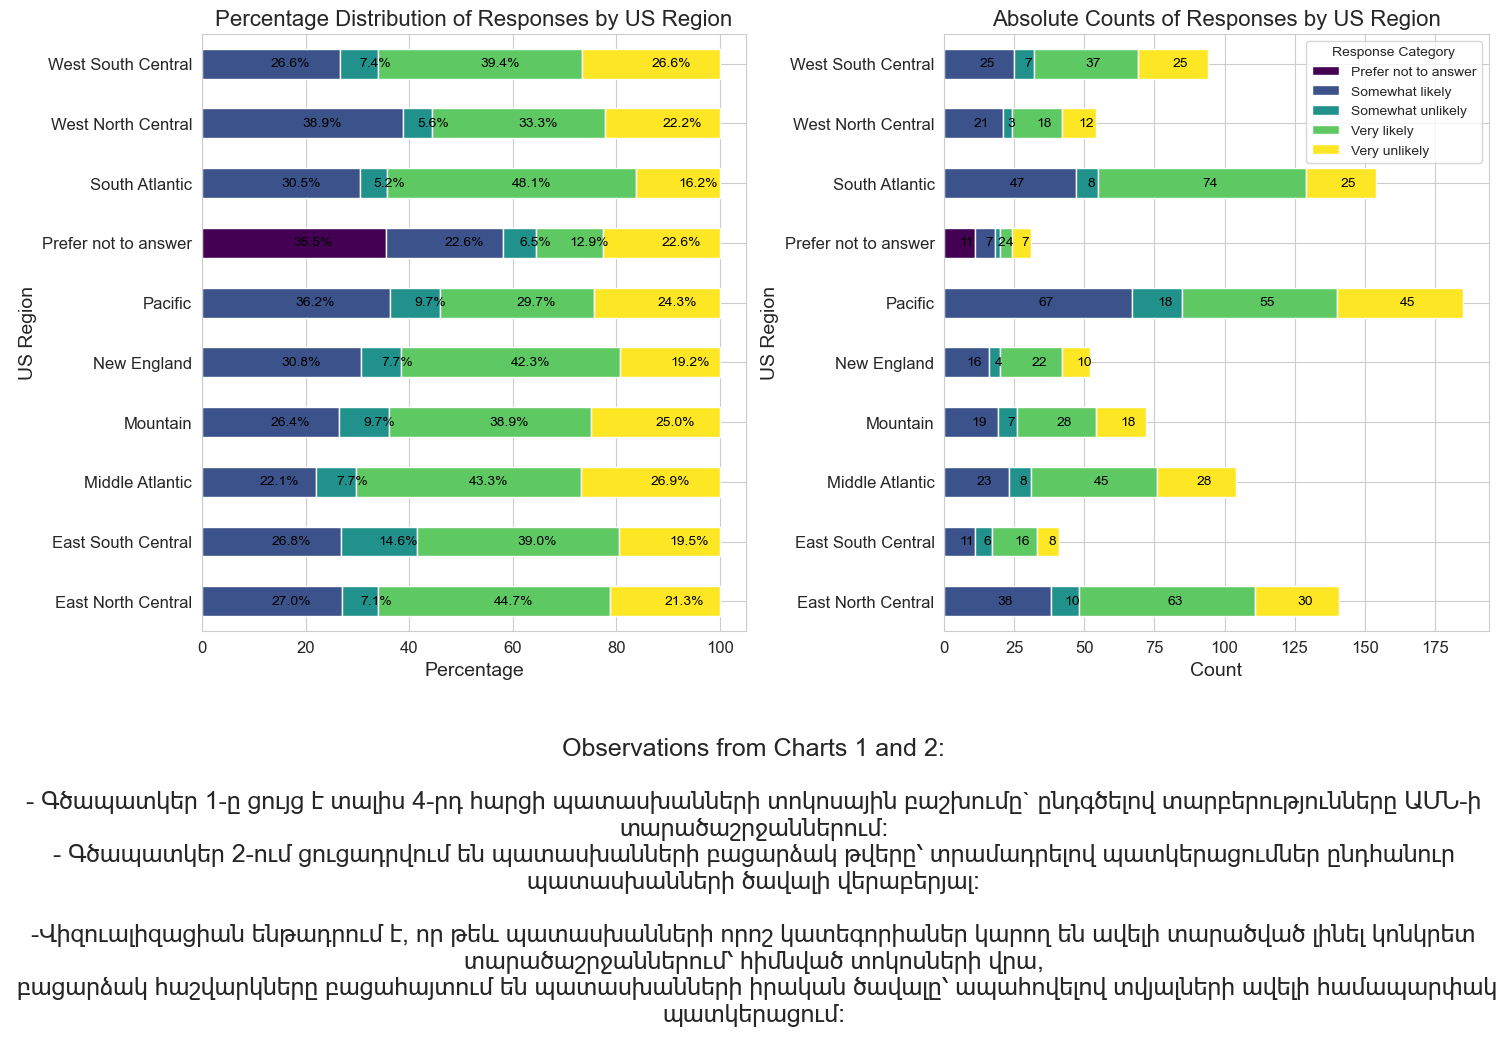

In [161]:
# Set seaborn style
sns.set_style("whitegrid")

# Create a figure and axis for subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot 1: Percentage of Question 4 by US Region (rows sum up to 100%)
data.plot(kind='barh', ax=axs[0], stacked=True, cmap='viridis')
axs[0].set_title('Percentage Distribution of Responses by US Region', fontsize=16)
axs[0].set_xlabel('Percentage', fontsize=14)
axs[0].set_ylabel('US Region', fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].legend().set_visible(False)  # Remove legend

# Add annotations for percentages with respective colors
for i, (index, row) in enumerate(data.iterrows()):
    left = 0
    for j, value in enumerate(row):
        if value > 0:  # Display annotation only if the value is greater than 0
            axs[0].text(left + value / 2, i, f'{value:.1f}%', color='black', va='center', fontsize=10)
            left += value

# Plot 2: Counts of Question 4 by US Region (absolute values)
data_1.plot(kind='barh', ax=axs[1], stacked=True, cmap='viridis')
axs[1].set_title('Absolute Counts of Responses by US Region', fontsize=16)
axs[1].set_xlabel('Count', fontsize=14)
axs[1].set_ylabel('US Region', fontsize=14)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].legend(title='Response Category', fontsize=10, loc='upper right')

# Add annotations for counts with respective colors
for i, (index, row) in enumerate(data_1.iterrows()):
    left = 0
    for j, value in enumerate(row):
        if value > 0:  # Display annotation only if the value is greater than 0
            axs[1].text(left + value / 2, i, f'{value:.0f}', color='black', va='center', fontsize=10)
            left += value

# Add description (Chart 3)
description = """
Observations from Charts 1 and 2:

- Գծապատկեր 1-ը ցույց է տալիս 4-րդ հարցի պատասխանների տոկոսային բաշխումը` ընդգծելով տարբերությունները ԱՄՆ-ի տարածաշրջաններում:
- Գծապատկեր 2-ում ցուցադրվում են պատասխանների բացարձակ թվերը՝ տրամադրելով պատկերացումներ ընդհանուր պատասխանների ծավալի վերաբերյալ:

-Վիզուալիզացիան ենթադրում է, որ թեև պատասխանների որոշ կատեգորիաներ կարող են ավելի տարածված լինել կոնկրետ տարածաշրջաններում՝ հիմնված տոկոսների վրա,
 բացարձակ հաշվարկները բացահայտում են պատասխանների իրական ծավալը՝ ապահովելով տվյալների ավելի համապարփակ պատկերացում:
"""

# Add text below the subplots
plt.figtext(0.5, -0.5, description, horizontalalignment='center', fontsize=18, wrap=True)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()
